In [7]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("Setup Complete")

netflix_filepath="/kaggle/input/netflix-shows/netflix_titles.csv"

netflix_data=pd.read_csv(netflix_filepath, index_col="show_id")
netflix_data.head()

Setup Complete


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
valid_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
netflix_data=netflix_data[netflix_data["rating"].isin(valid_ratings)]

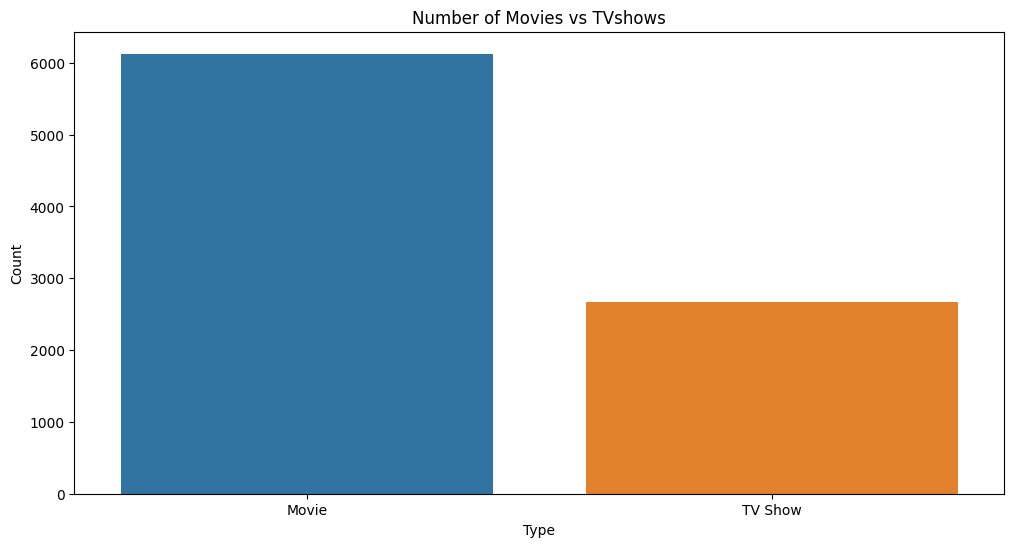

In [9]:
#Count plots
#Number of movies VS TVshows
plt.figure(figsize=(12, 6))
sns.countplot(x="type", data=netflix_data)
plt.title("Number of Movies vs TVshows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

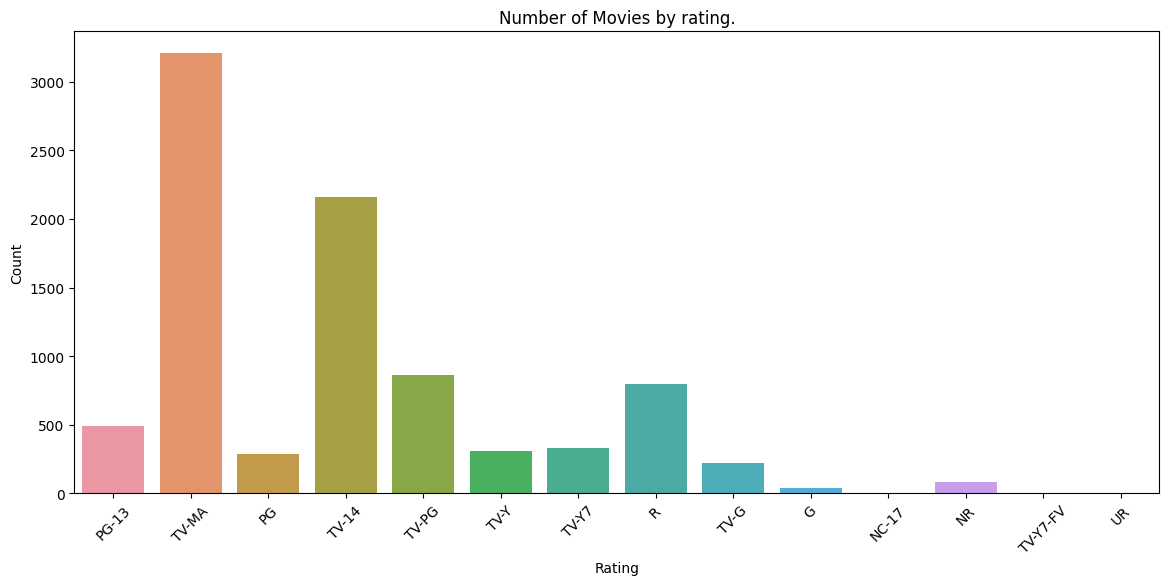

In [10]:
#Number of Movies by rating.
plt.figure(figsize=(14, 6))
sns.countplot(x="rating", data=netflix_data)
plt.title("Number of Movies by rating.")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

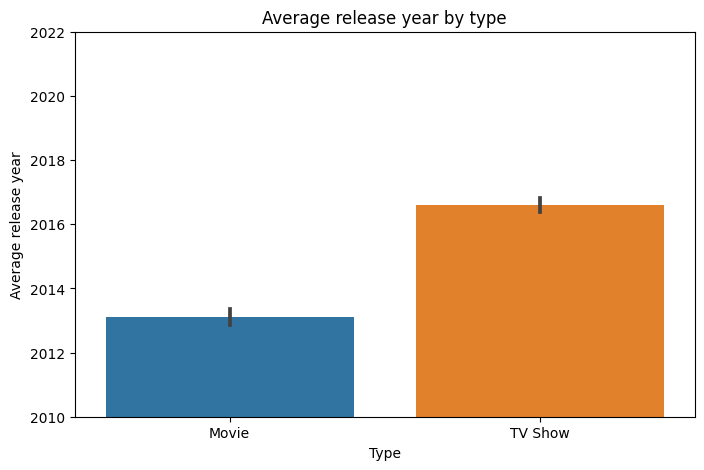

In [11]:
#Bar plot 
#Average release year by type
plt.figure(figsize=(8, 5))
sns.barplot(x="type", y="release_year", data=netflix_data)
plt.ylim(2010, 2022)
plt.title("Average release year by type")
plt.xlabel("Type")
plt.ylabel("Average release year")
plt.show()


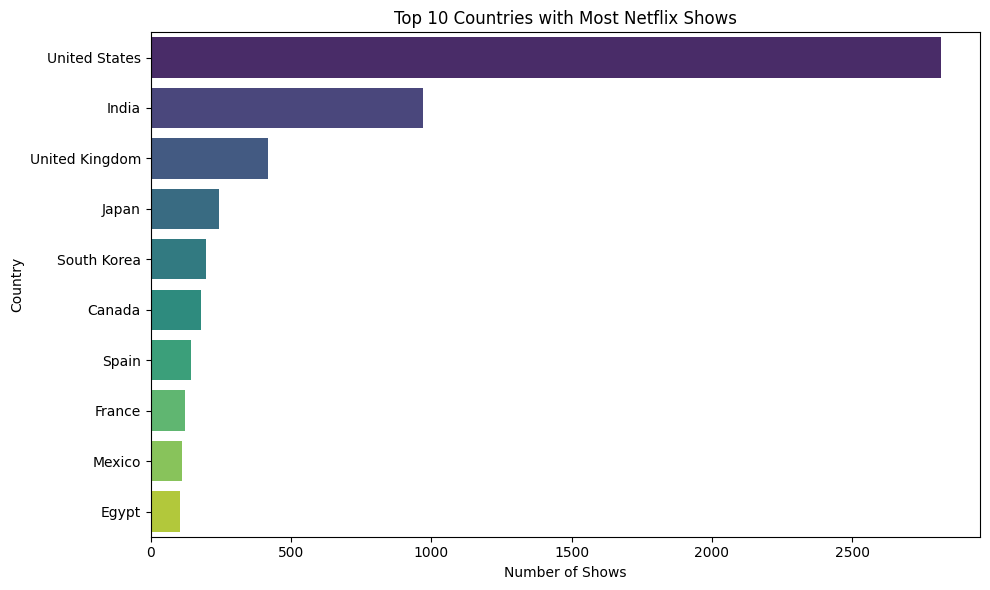

In [12]:
#Top 10 countries with most shows
top_countries=(netflix_data["country"]
               .value_counts()
               .dropna()
               .head(10)
               .reset_index())

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="country", data=top_countries, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.show()




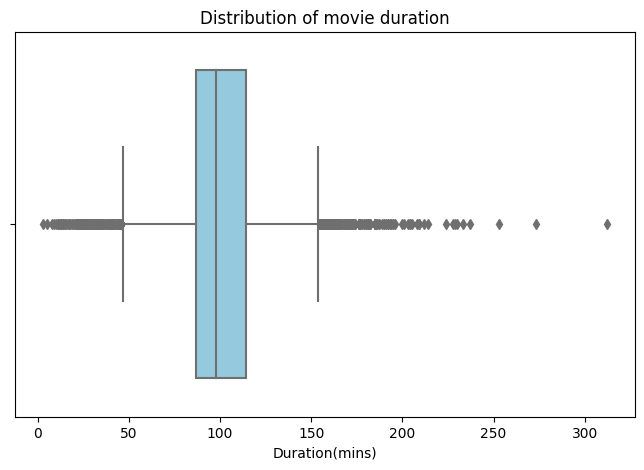

In [14]:
#Plot box plot of movie durations(create a new column duration_mins)

movies_df=netflix_data[netflix_data["type"]=="Movie"].copy()

movies_df["duration_mins"]=movies_df["duration"].str.replace(" min", "").astype(float)

plt.figure(figsize=(8, 5))
sns.boxplot(x=movies_df["duration_mins"], color="skyblue")
plt.title("Distribution of movie duration")
plt.xlabel("Duration(mins)")
plt.show()

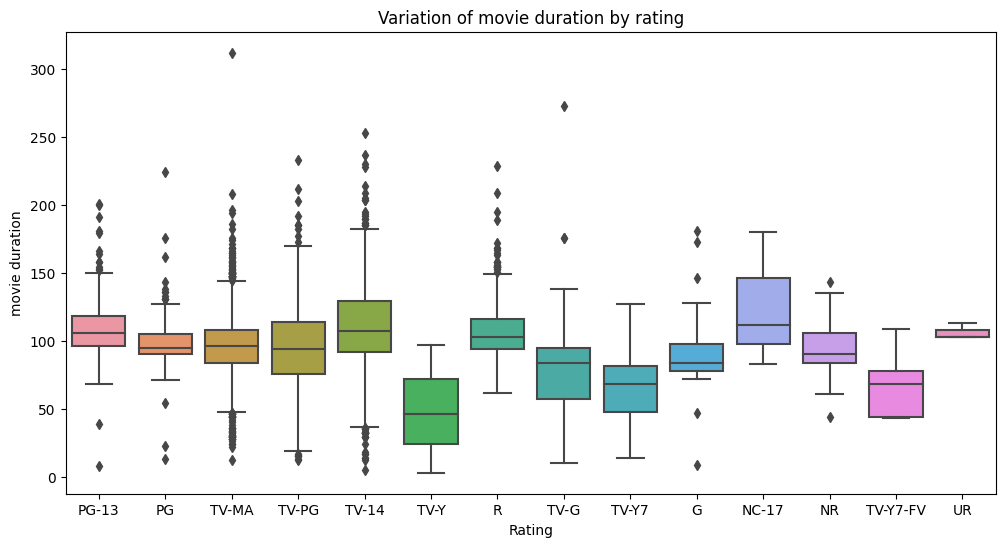

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="rating", y="duration_mins", data=movies_df)
plt.title("Variation of movie duration by rating")
plt.xlabel("Rating")
plt.ylabel("movie duration")
plt.show()


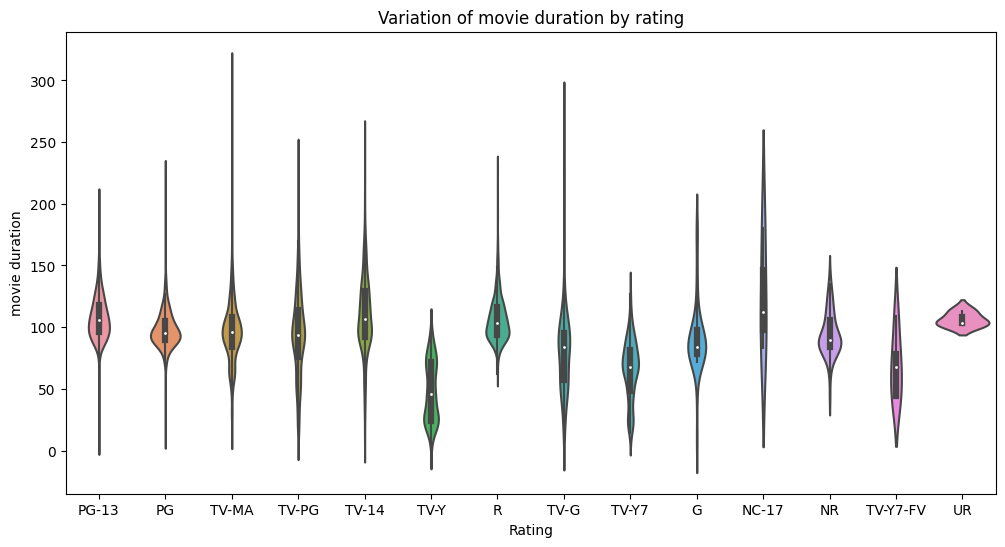

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="rating", y="duration_mins", data=movies_df)
plt.title("Variation of movie duration by rating")
plt.xlabel("Rating")
plt.ylabel("movie duration")
plt.show()


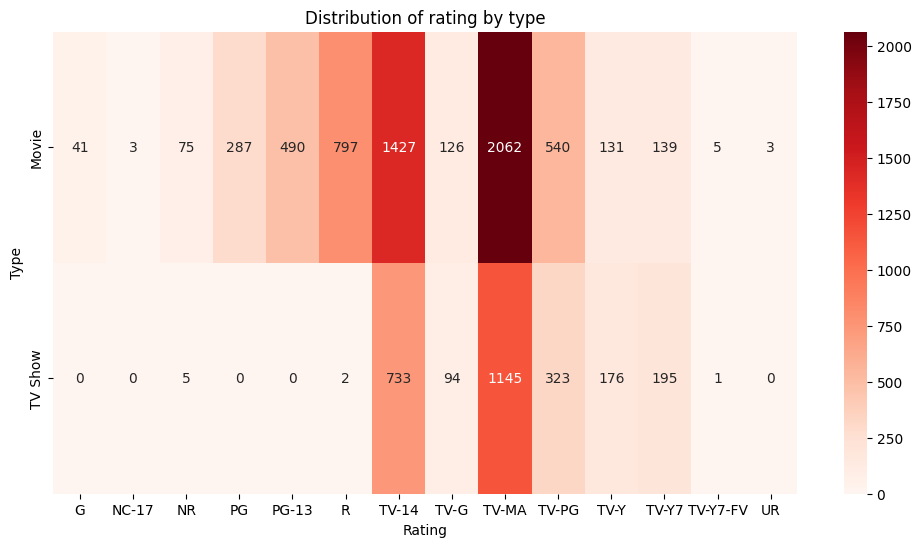

In [17]:
#Heatmap: Create a crosstab (e.g. pd.crosstab(df['type'], df['rating']))

heatmap_data=pd.crosstab(netflix_data["type"], netflix_data["rating"])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Distribution of rating by type")
plt.xlabel("Rating")
plt.ylabel("Type")
plt.show()

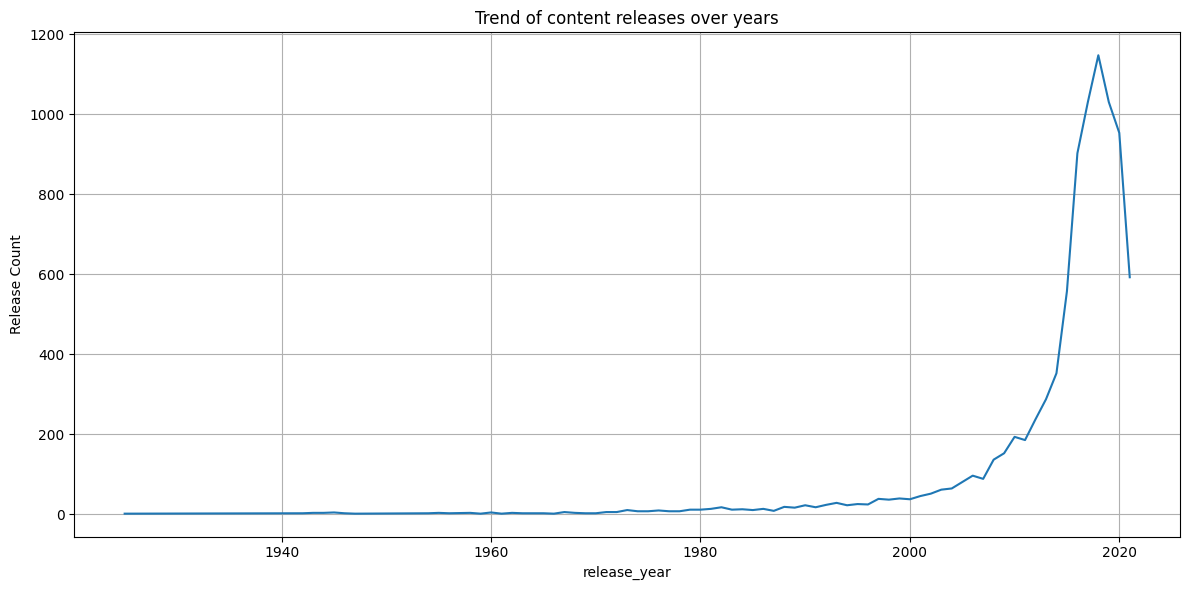

In [18]:
#Lineplot:
#Trend of content releases over years (use df['release_year'].value_counts() and sort)

yearly_counts=netflix_data["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Trend of content releases over years")
plt.ylabel("Release Count")
plt.grid(True)
plt.tight_layout()
plt.show()

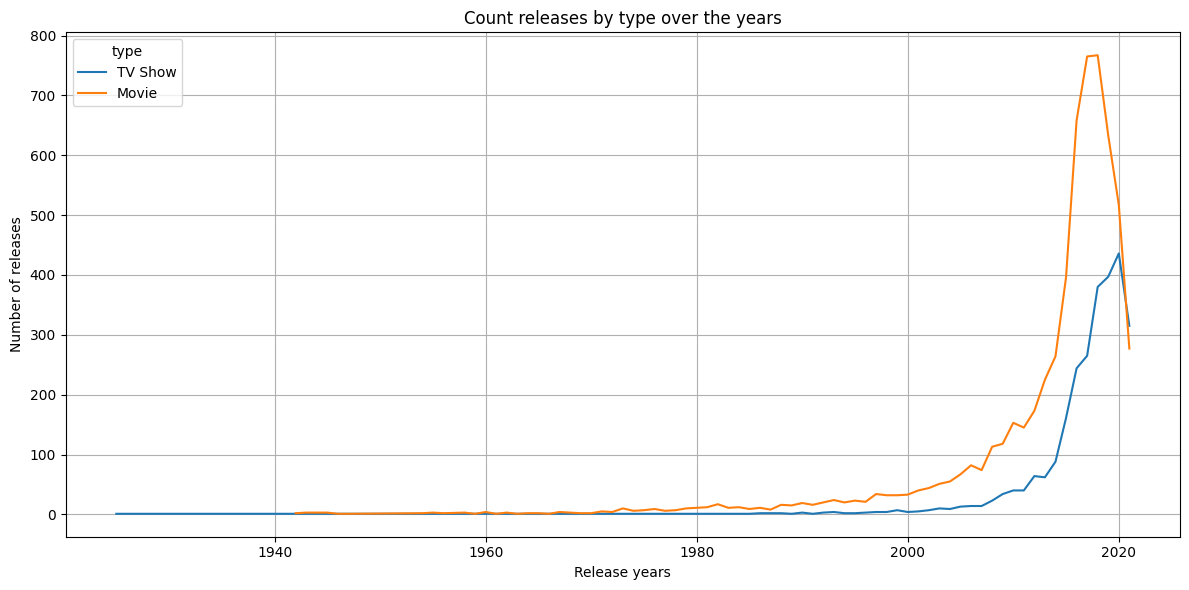

In [19]:
#comparing movies vs tv shows trend

trend_df=netflix_data.groupby(["release_year", "type"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(x="release_year", y="count", data=trend_df, hue="type")
plt.title("Count releases by type over the years")
plt.xlabel("Release years")
plt.ylabel("Number of releases")
plt.grid(True)
plt.tight_layout()
plt.show()

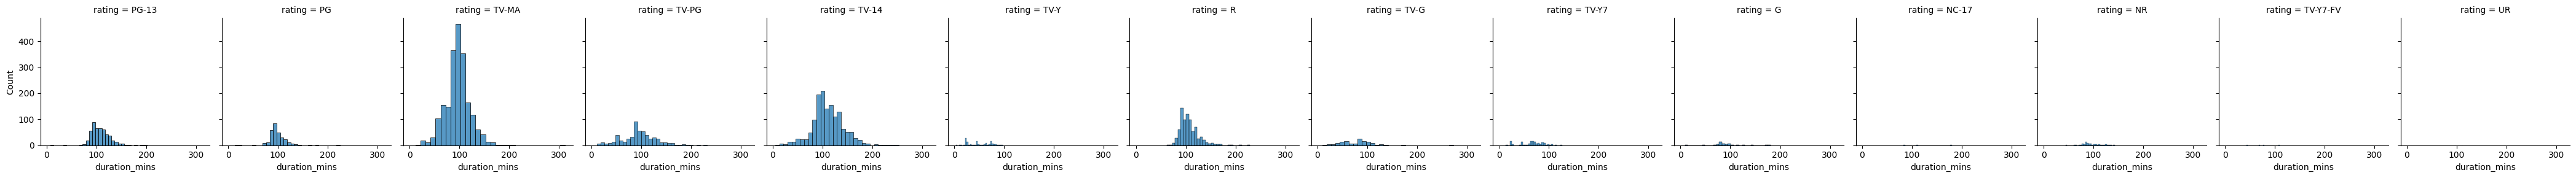

In [20]:
g = sns.FacetGrid(movies_df, col="rating")
g.map(sns.histplot, "duration_mins", bins=30)

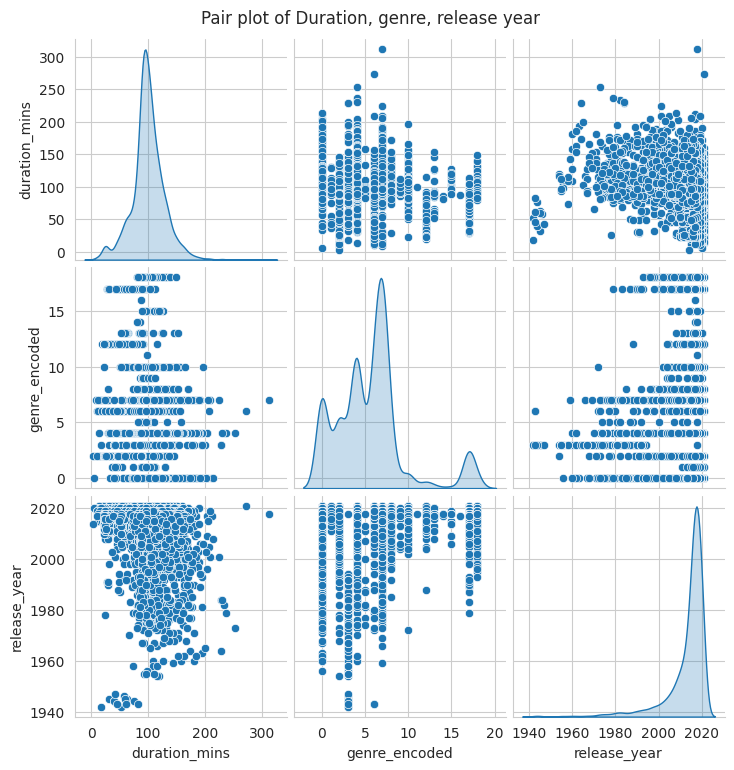

In [21]:
# What is a Pairplot? - A pairplot creates scatter plots for every pair of numeric columns, 
#                       along with histograms or KDE on the diagonal.
#It's powerful for:
#1. Visualizing relationships between numeric features
#2. Spotting correlations, clusters, or outliers

#we already have created a movie_df with numerical values for duration.
#now we will take main genre from listed_in column and encode it - categorical to numbers

movies_df["genre_main"]=movies_df["listed_in"].str.split(",").str[0]
movies_df["genre_encoded"]=movies_df["genre_main"].astype("category").cat.codes

#now we have given each unique genre a number now lets create a pairplot df.
pairplot_df=movies_df[["duration_mins", "genre_encoded", "release_year"]].dropna()

sns.set_style("whitegrid")
sns.pairplot(pairplot_df, palette="coolwarm", diag_kind="kde")
plt.suptitle("Pair plot of Duration, genre, release year", y=1.02)
plt.show()




In [ ]:
#End.